In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, validation_curve, learning_curve
import warnings
import time
warnings.filterwarnings('ignore')
from random import randint


In [2]:
def plotting(labels, data, rang, x, y, title, file):
    plt.figure()
    for label, arr in zip(labels, data):
        plt.plot(rang, arr, label=label)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.savefig(file, dpi = 1200)

In [3]:
df = pd.read_csv('/Users/qingzhou/Desktop/GT_OMSCS/Machine_Learning_CS7641/assignment_1/winequality-white.csv')
df.isnull().sum()
x_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
y_output = ['quality']
class_name = ['bad', 'good']
data = df
df_x, df_y = data[x_features], data[y_output]
df_y['quality'].mask(df['quality'] <=5, 0, inplace= True)
df_y['quality'].mask(df['quality'] >=6, 1, inplace= True)
sc = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.2)
X_train, X_test = sc.fit_transform(X_train), sc.fit_transform(X_test)



In [4]:
def nn2(x_train, y_train, x, y, algo, restart, schedule, size, key, mut):
    if size:
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', pop_size = size, mutation_prob=mut,
                                          max_iters=50000, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('ga')
    elif schedule:  
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', schedule= schedule,
                                          max_iters=50000, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('sa')
    elif restart:
        nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes = [25, 2], algorithm = algo, activation='identity', restarts= restart,
                                          max_iters=50000, learning_rate=1e-3, early_stopping = True, random_state=10, max_attempts = 1000)
        print('rhc')
    
    start = time.time()
    nn_model.fit(x_train, y_train)
    model_time2[key].append(time.time()-start)
    
    pred_train = nn_model.predict(x_train)
    y_acc_train = accuracy_score(y_train, pred_train)
    
    
    pred = nn_model.predict(x)
    y_acc = accuracy_score(y, pred)
    model_acc2[key]['train'].append(y_acc_train)
    model_acc2[key]['test'].append(y_acc)
    print(y_acc_train, y_acc)

In [5]:
model_time2 = {0:[], 1:[], 2:[], 3:[]}
model_acc2 = {0:{'train':[], 'test':[]}, 1:{'train':[], 'test':[]}, 
             2:{'train':[], 'test':[]}, 3:{'train':[], 'test':[]}}

In [6]:
for i in [10, 50, 100]:
    nn2(X_train, Y_train, X_test, Y_test, 'random_hill_climb', i, None, None, 0, 0)

rhc
0.6939765186319551 0.6938775510204082
rhc
0.6962736089841756 0.6908163265306122
rhc
0.6962736089841756 0.6908163265306122


In [7]:
for decay in [mlrose_hiive.GeomDecay(),mlrose_hiive.ArithDecay(),mlrose_hiive.ExpDecay()]:
    nn2(X_train, Y_train, X_test, Y_test, 'simulated_annealing', None, decay, None, 1, 0)

sa
0.6401225114854517 0.6255102040816326
sa
0.6388463501786625 0.6265306122448979
sa
0.6403777437468096 0.6265306122448979


In [8]:
for mut in [0.1, 0.3, 0.6]:
    nn2(X_train, Y_train, X_test, Y_test, 'genetic_alg', None, None, 200, 2, mut)

ga
0.7572741194486983 0.763265306122449
ga
0.7447677386421644 0.746938775510204
ga
0.7348136804492088 0.7479591836734694


In [9]:
for size in [200,600,1000]:
    nn2(X_train, Y_train, X_test, Y_test, 'genetic_alg', None, None, size, 2, 0.2)

ga
0.7519142419601837 0.7459183673469387
ga
0.7511485451761103 0.7520408163265306
ga
0.7552322613578356 0.7602040816326531


In [ ]:
model_labels = ['Random Hill Climb', 'Simulated Annealing', 'Genetic Algorithm']

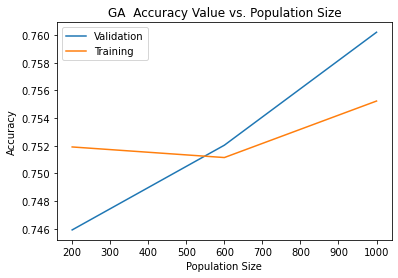

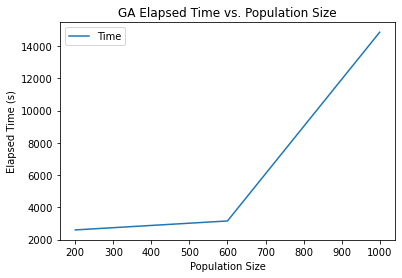

In [30]:
plotting(['Validation', 'Training'], [model_acc2[2]['test'][3:],model_acc2[2]['train'][3:]],np.array([200,600,1000]), 
         'Population Size', 'Accuracy', 'GA  Accuracy Value vs. Population Size', 'nngap_fit_itr.png')
plotting(['Time'], [model_time2[2][3:]],np.array([200,600,1000]), 
         'Population Size', 'Elapsed Time (s)', 'GA Elapsed Time vs. Population Size', 'nngap_time_itr.png')

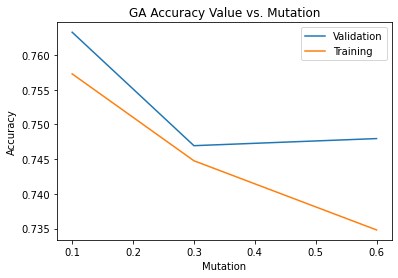

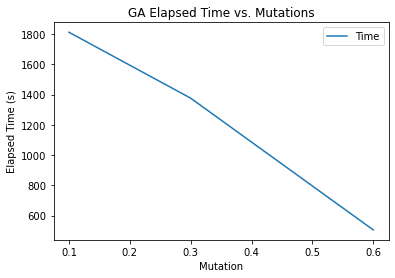

In [31]:
plotting(['Validation', 'Training'], [model_acc2[2]['test'][:3],model_acc2[2]['train'][:3]],np.array([0.1, 0.3, 0.6]), 
         'Mutation', 'Accuracy', 'GA Accuracy Value vs. Mutation', 'nngam_fit_itr.png')
plotting(['Time'], [model_time2[2][:3]],np.array([0.1, 0.3, 0.6]), 
         'Mutation', 'Elapsed Time (s)', 'GA Elapsed Time vs. Mutations', 'nngam_time_itr.png')

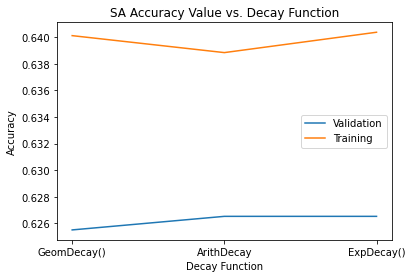

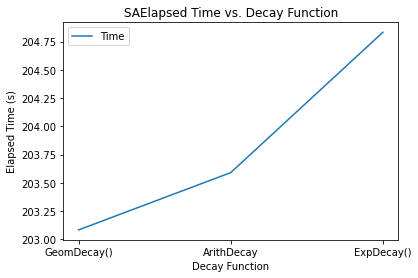

In [32]:
plotting(['Validation', 'Training'], [model_acc2[1]['test'],model_acc2[1]['train']],np.array(['GeomDecay()','ArithDecay','ExpDecay()']), 
         'Decay Function', 'Accuracy', 'SA Accuracy Value vs. Decay Function', 'nnsa_fit_itr.png')
plotting(['Time'], [model_time2[1]],np.array(['GeomDecay()','ArithDecay','ExpDecay()']), 
         'Decay Function', 'Elapsed Time (s)', 'SAElapsed Time vs. Decay Function', 'nnsa_time_itr.png')

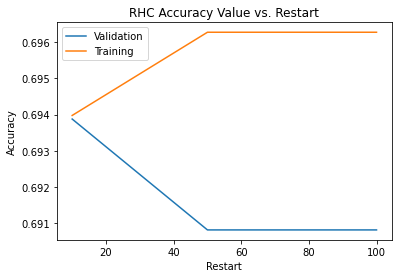

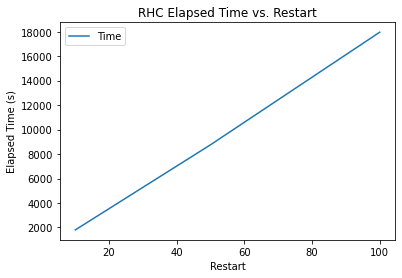

In [33]:
plotting(['Validation', 'Training'], [model_acc2[0]['test'],model_acc2[0]['train']],np.array([10, 50, 100]), 
         'Restart', 'Accuracy', 'RHC Accuracy Value vs. Restart', 'nnrhc_fit_itr.png')
plotting(['Time'], [model_time2[0]],np.array([10, 50, 100]), 
         'Restart', 'Elapsed Time (s)', 'RHC Elapsed Time vs. Restart', 'nnrhc_time_itr.png')